In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from bs4 import BeautifulSoup
from scipy import stats
from sklearn.model_selection import train_test_split # 학습용과 테스트용 데이터로 분리해주는 함수
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.neighbors import * # 선형회귀 모델
from sklearn.metrics import mean_squared_error # 잔차 에러 평균, 오차제곱평균, 정확도 측정지표
from sklearn.metrics import accuracy_score # 모델 예측 정확도 측정 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀보델 임포트
from sklearn.preprocessing import *
plt.rcParams['font.family'] = 'D2Coding'

In [46]:
url = 'http://apis.data.go.kr/B552521/aroundAir/getData'
params ={'serviceKey' : 'bpyM+DPYXXSFsPBTXiGPeM5AKss0t8aL1dpb2SWiMBMWQZBcxqIr06HuAi/g04KGsqHEfQCIE95OJ7cmMi4n4Q==', 'pageNo' : '1', 'numOfRows' : '999999', 'stationName' : '859007', 'dataDate' : '20200101', 'dataTerm' : 'YEAR' }
response = requests.get(url, params=params)
ochan0 = response.content

In [5]:
url = 'http://apis.data.go.kr/B552521/aroundAir/getData'
params ={'serviceKey' : 'bpyM+DPYXXSFsPBTXiGPeM5AKss0t8aL1dpb2SWiMBMWQZBcxqIr06HuAi/g04KGsqHEfQCIE95OJ7cmMi4n4Q==', 'pageNo' : '1', 'numOfRows' : '999999', 'stationName' : '859007', 'dataDate' : '20210101', 'dataTerm' : 'YEAR' }
response = requests.get(url, params=params)
ochan1 = response.content

In [6]:
url = 'http://apis.data.go.kr/B552521/aroundAir/getData'
params ={'serviceKey' : 'bpyM+DPYXXSFsPBTXiGPeM5AKss0t8aL1dpb2SWiMBMWQZBcxqIr06HuAi/g04KGsqHEfQCIE95OJ7cmMi4n4Q==', 'pageNo' : '1', 'numOfRows' : '999999', 'stationName' : '859007', 'dataDate' : '20220101', 'dataTerm' : 'YEAR' }
response = requests.get(url, params=params)
ochan2 = response.content

In [36]:
url = 'http://apis.data.go.kr/B552521/aroundAir/getData'
params ={'serviceKey' : 'bpyM+DPYXXSFsPBTXiGPeM5AKss0t8aL1dpb2SWiMBMWQZBcxqIr06HuAi/g04KGsqHEfQCIE95OJ7cmMi4n4Q==', 'pageNo' : '1', 'numOfRows' : '999999', 'stationName' : '859007', 'dataDate' : '20230101', 'dataTerm' : 'YEAR' }
response = requests.get(url, params=params)
ochan3 = response.content

In [47]:
# BeautifulSoup을 사용하여 XML 파싱
ochan_soup = BeautifulSoup(ochan0, 'xml')

# 모든 <item> 요소를 찾음
items = ochan_soup.find_all('item')

# 모든 값을 담을 리스트 생성
ochan_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    ochan_values.append(item_values)
ochan0_df = pd.DataFrame(ochan_values)
ochan0_df

,datatime
0,2020-01-01 00:00
1,2020-01-01 00:30
2,2020-01-01 01:00
3,2020-01-01 01:30
4,2020-01-01 02:00
...,...
17515,2020-12-30 21:30
17516,2020-12-30 22:00
17517,2020-12-30 22:30
17518,2020-12-30 23:00


In [9]:
# BeautifulSoup을 사용하여 XML 파싱
ochan_soup = BeautifulSoup(ochan1, 'xml')

# 모든 <item> 요소를 찾음
items = ochan_soup.find_all('item')

# 모든 값을 담을 리스트 생성
ochan_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    ochan_values.append(item_values)
ochan1_df = pd.DataFrame(ochan_values)
ochan1_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2021-01-01 00:00,0.001,0.089,0.022,0,31,1,3,1,1,2
1,2021-01-01 00:30,0.001,0.080,0.023,0,32,1,3,1,1,2
2,2021-01-01 01:00,0.001,0.093,0.022,0,31,1,3,1,1,2
3,2021-01-01 01:30,0.001,0.088,0.022,0,31,1,3,1,1,2
4,2021-01-01 02:00,0.001,0.098,0.020,0,34,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
17515,2021-12-31 21:30,0.002,0.006,0.021,25,10,1,1,1,1,1
17516,2021-12-31 22:00,0.002,0.007,0.019,18,10,1,1,1,1,1
17517,2021-12-31 22:30,0.002,0.006,0.018,18,10,1,1,1,1,1
17518,2021-12-31 23:00,0.002,0.007,0.017,18,13,1,1,1,1,1


In [10]:
# BeautifulSoup을 사용하여 XML 파싱
ochan_soup = BeautifulSoup(ochan2, 'xml')

# 모든 <item> 요소를 찾음
items = ochan_soup.find_all('item')

# 모든 값을 담을 리스트 생성
ochan_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    ochan_values.append(item_values)
ochan2_df = pd.DataFrame(ochan_values)
ochan2_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2022-01-01 00:00,0.002,0.009,0.014,20,17,1,1,1,1,2
1,2022-01-01 00:30,0.002,0.011,0.012,20,17,1,1,1,1,2
2,2022-01-01 01:00,0.002,0.013,0.010,27,21,1,1,1,1,2
3,2022-01-01 01:30,0.002,0.014,0.009,27,21,1,1,1,1,2
4,2022-01-01 02:00,0.002,0.015,0.008,24,23,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 21:30,0.005,0.016,0.009,79,30,1,1,1,2,2
17516,2022-12-31 22:00,0.005,0.013,0.012,55,33,1,1,1,2,2
17517,2022-12-31 22:30,0.003,0.011,0.010,55,32,1,1,1,2,2
17518,2022-12-31 23:00,0.003,0.013,0.008,67,35,1,1,1,2,2


In [37]:
# BeautifulSoup을 사용하여 XML 파싱
ochan_soup = BeautifulSoup(ochan3, 'xml')

# 모든 <item> 요소를 찾음
items = ochan_soup.find_all('item')

# 모든 값을 담을 리스트 생성
ochan_values = []

# 각 item에서 모든 값을 추출하여 리스트에 추가
for item in items:
    item_values = {}
    # item의 모든 자식 요소들을 반복하여 처리
    for child in item.children:
        if child.name:
            item_values[child.name] = child.text.strip()
    ochan_values.append(item_values)
ochan3_df = pd.DataFrame(ochan_values)
ochan3_df

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade
0,2023-01-01 00:00,0.004,0.010,0.007,52,40,1,1,1,2,2
1,2023-01-01 00:30,0.004,0.010,0.006,52,40,1,1,1,2,2
2,2023-01-01 01:00,0.005,0.013,0.004,63,44,1,1,1,2,2
3,2023-01-01 01:30,0.002,0.011,0.004,63,44,1,1,1,2,2
4,2023-01-01 02:00,0.003,0.011,0.003,72,49,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
17515,2023-12-31 21:30,0.000,0.000,0.000,15.9,26,1,1,1,1,2
17516,2023-12-31 22:00,0.000,0.000,0.000,18.4,24,1,1,1,1,2
17517,2023-12-31 22:30,0.000,0.000,0.000,18.4,23,1,1,1,1,2
17518,2023-12-31 23:00,0.000,0.000,0.000,13.7,26,1,1,1,1,2


In [4]:
# ochan_df1['year'] = pd.to_datetime(ochan_df1['datatime']).dt.year
# ochan_df1.head()

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,year
0,2022-01-01 00:00,0.002,0.009,0.014,20,17,1,1,1,1,2,2022
1,2022-01-01 00:30,0.002,0.011,0.012,20,17,1,1,1,1,2,2022
2,2022-01-01 01:00,0.002,0.013,0.010,27,21,1,1,1,1,2,2022
3,2022-01-01 01:30,0.002,0.014,0.009,27,21,1,1,1,1,2,2022
4,2022-01-01 02:00,0.002,0.015,0.008,24,23,1,1,1,1,2,2022


In [5]:
# ochan_df['month'] = pd.to_datetime(ochan_df['datatime']).dt.month
# ochan_df.head()

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,year,month
0,2022-01-01 00:00,0.002,0.009,0.014,20,17,1,1,1,1,2,2022,1
1,2022-01-01 00:30,0.002,0.011,0.012,20,17,1,1,1,1,2,2022,1
2,2022-01-01 01:00,0.002,0.013,0.010,27,21,1,1,1,1,2,2022,1
3,2022-01-01 01:30,0.002,0.014,0.009,27,21,1,1,1,1,2,2022,1
4,2022-01-01 02:00,0.002,0.015,0.008,24,23,1,1,1,1,2,2022,1


In [12]:
ochan1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datatime   17520 non-null  object
 1   so2value   17518 non-null  object
 2   no2value   17518 non-null  object
 3   o3value    17518 non-null  object
 4   pm10value  17518 non-null  object
 5   pm25value  17518 non-null  object
 6   so2grade   17518 non-null  object
 7   no2grade   17518 non-null  object
 8   o3grade    17518 non-null  object
 9   pm10grade  17518 non-null  object
 10  pm25grade  17518 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB


In [13]:
ochan2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datatime   17520 non-null  object
 1   so2value   16076 non-null  object
 2   no2value   16055 non-null  object
 3   o3value    16033 non-null  object
 4   pm10value  16013 non-null  object
 5   pm25value  15993 non-null  object
 6   so2grade   16076 non-null  object
 7   no2grade   16055 non-null  object
 8   o3grade    16033 non-null  object
 9   pm10grade  16013 non-null  object
 10  pm25grade  15993 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB


In [ ]:
# ochan_df['date'] = str(ochan_df['year']) + str(ochan_df['month'])
# ochan_df.head()

In [9]:
# 'year' 열을 객체(object) 타입으로 변환합니다.
ochan_df['year'] = ochan_df['year'].astype('object')

# 'month' 열을 객체(object) 타입으로 변환합니다.
ochan_df['month'] = ochan_df['month'].astype('object')

In [ ]:
# # 문자열을 datetime 객체로 변환
# date_obj = datetime.strptime(ochan_df['datatime'], "%Y-%m-%d %H:%M")

# # 필요한 부분만 추출 (YYYY-MM)
# new_date_string = date_obj.strftime("%Y-%m")

In [14]:
# 'datatime' 열에서 각 값의 처음부터 7번째 문자까지(년-월 형식)를 추출하여 'date' 열에 저장합니다.
ochan1_df['date'] = ochan1_df['datatime'].apply(lambda x: x[:7])

# 데이터프레임의 처음 10개 행을 출력하여 확인합니다.
ochan1_df.head(10)

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,date
0,2021-01-01 00:00,0.001,0.089,0.022,0,31,1,3,1,1,2,2021-01
1,2021-01-01 00:30,0.001,0.080,0.023,0,32,1,3,1,1,2,2021-01
2,2021-01-01 01:00,0.001,0.093,0.022,0,31,1,3,1,1,2,2021-01
3,2021-01-01 01:30,0.001,0.088,0.022,0,31,1,3,1,1,2,2021-01
4,2021-01-01 02:00,0.001,0.098,0.020,0,34,1,3,1,1,2,2021-01
5,2021-01-01 02:30,0.001,0.094,0.021,0,33,1,3,1,1,2,2021-01
6,2021-01-01 03:00,0.001,0.092,0.020,0,38,1,3,1,1,2,2021-01
7,2021-01-01 03:30,0.001,0.092,0.020,0,37,1,3,1,1,2,2021-01
8,2021-01-01 04:00,0.001,0.092,0.019,0,37,1,3,1,1,2,2021-01
9,2021-01-01 04:30,0.001,0.072,0.025,0,36,1,3,1,1,2,2021-01


In [15]:
# 'datatime' 열에서 각 값의 처음부터 7번째 문자까지(년-월 형식)를 추출하여 'date' 열에 저장합니다.
ochan2_df['date'] = ochan2_df['datatime'].apply(lambda x: x[:7])

# 데이터프레임의 처음 10개 행을 출력하여 확인합니다.
ochan2_df.head(10)

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,date
0,2022-01-01 00:00,0.002,0.009,0.014,20,17,1,1,1,1,2,2022-01
1,2022-01-01 00:30,0.002,0.011,0.012,20,17,1,1,1,1,2,2022-01
2,2022-01-01 01:00,0.002,0.013,0.010,27,21,1,1,1,1,2,2022-01
3,2022-01-01 01:30,0.002,0.014,0.009,27,21,1,1,1,1,2,2022-01
4,2022-01-01 02:00,0.002,0.015,0.008,24,23,1,1,1,1,2,2022-01
5,2022-01-01 02:30,0.002,0.016,0.008,24,24,1,1,1,1,2,2022-01
6,2022-01-01 03:00,0.002,0.014,0.008,25,25,1,1,1,1,2,2022-01
7,2022-01-01 03:30,0.002,0.013,0.009,25,26,1,1,1,1,2,2022-01
8,2022-01-01 04:00,0.002,0.010,0.011,25,25,1,1,1,1,2,2022-01
9,2022-01-01 04:30,0.002,0.009,0.014,25,24,1,1,1,1,2,2022-01


In [38]:
# 'datatime' 열에서 각 값의 처음부터 7번째 문자까지(년-월 형식)를 추출하여 'date' 열에 저장합니다.
ochan3_df['date'] = ochan3_df['datatime'].apply(lambda x: x[:7])

# 데이터프레임의 처음 10개 행을 출력하여 확인합니다.
ochan3_df.head(10)

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,date
0,2023-01-01 00:00,0.004,0.010,0.007,52,40,1,1,1,2,2,2023-01
1,2023-01-01 00:30,0.004,0.010,0.006,52,40,1,1,1,2,2,2023-01
2,2023-01-01 01:00,0.005,0.013,0.004,63,44,1,1,1,2,2,2023-01
3,2023-01-01 01:30,0.002,0.011,0.004,63,44,1,1,1,2,2,2023-01
4,2023-01-01 02:00,0.003,0.011,0.003,72,49,1,1,1,2,2,2023-01
5,2023-01-01 02:30,0.002,0.012,0.003,72,49,1,1,1,2,2,2023-01
6,2023-01-01 03:00,0.002,0.013,0.004,61,44,1,1,1,2,2,2023-01
7,2023-01-01 03:30,0.002,0.013,0.002,61,44,1,1,1,2,2,2023-01
8,2023-01-01 04:00,0.002,0.013,0.002,72,44,1,1,1,2,2,2023-01
9,2023-01-01 04:30,0.001,0.013,0.002,72,44,1,1,1,2,2,2023-01


In [11]:
# # 'year'과 'month' 열을 제거한 데이터프레임을 생성합니다.
# ochan_df = ochan_df.drop(['year', 'month'], axis=1)

# # 데이터프레임의 마지막 10개 행을 출력하여 확인합니다.
# ochan_df.tail(10)


,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,date
17510,2022-12-31 19:00,0.006,0.032,0.005,45,20,1,2,1,2,2,2022-12
17511,2022-12-31 19:30,0.006,0.018,0.009,45,20,1,1,1,2,2,2022-12
17512,2022-12-31 20:00,0.004,0.017,0.009,58,25,1,1,1,2,2,2022-12
17513,2022-12-31 20:30,0.005,0.013,0.010,58,25,1,1,1,2,2,2022-12
17514,2022-12-31 21:00,0.004,0.014,0.011,79,30,1,1,1,2,2,2022-12
17515,2022-12-31 21:30,0.005,0.016,0.009,79,30,1,1,1,2,2,2022-12
17516,2022-12-31 22:00,0.005,0.013,0.012,55,33,1,1,1,2,2,2022-12
17517,2022-12-31 22:30,0.003,0.011,0.010,55,32,1,1,1,2,2,2022-12
17518,2022-12-31 23:00,0.003,0.013,0.008,67,35,1,1,1,2,2,2022-12
17519,2022-12-31 23:30,0.001,0.011,0.008,67,35,1,1,1,2,2,2022-12


In [24]:
ochan_df.tail(10)

,datatime,so2value,no2value,o3value,pm10value,pm25value,so2grade,no2grade,o3grade,pm10grade,pm25grade,date
17510,2022-12-31 19:00,0.006,0.032,0.005,45,20,1,2,1,2,2,2022-12
17511,2022-12-31 19:30,0.006,0.018,0.009,45,20,1,1,1,2,2,2022-12
17512,2022-12-31 20:00,0.004,0.017,0.009,58,25,1,1,1,2,2,2022-12
17513,2022-12-31 20:30,0.005,0.013,0.010,58,25,1,1,1,2,2,2022-12
17514,2022-12-31 21:00,0.004,0.014,0.011,79,30,1,1,1,2,2,2022-12
17515,2022-12-31 21:30,0.005,0.016,0.009,79,30,1,1,1,2,2,2022-12
17516,2022-12-31 22:00,0.005,0.013,0.012,55,33,1,1,1,2,2,2022-12
17517,2022-12-31 22:30,0.003,0.011,0.010,55,32,1,1,1,2,2,2022-12
17518,2022-12-31 23:00,0.003,0.013,0.008,67,35,1,1,1,2,2,2022-12
17519,2022-12-31 23:30,0.001,0.011,0.008,67,35,1,1,1,2,2,2022-12


In [21]:
# 'so2value', 'no2value', 'o3value', 'so2grade', 'no2grade', 'o3grade' 열을 제거한 새로운 데이터프레임을 생성합니다.
ochan_gonmis1 = ochan1_df.drop(['so2value', 'no2value', 'o3value', 'so2grade', 'no2grade', 'o3grade'], axis=1)

# 데이터프레임의 처음 10개 행을 출력하여 확인합니다.
ochan_gonmis1.head(10)

,datatime,pm10value,pm25value,pm10grade,pm25grade,date
0,2021-01-01 00:00,0,31,1,2,2021-01
1,2021-01-01 00:30,0,32,1,2,2021-01
2,2021-01-01 01:00,0,31,1,2,2021-01
3,2021-01-01 01:30,0,31,1,2,2021-01
4,2021-01-01 02:00,0,34,1,2,2021-01
5,2021-01-01 02:30,0,33,1,2,2021-01
6,2021-01-01 03:00,0,38,1,2,2021-01
7,2021-01-01 03:30,0,37,1,2,2021-01
8,2021-01-01 04:00,0,37,1,2,2021-01
9,2021-01-01 04:30,0,36,1,2,2021-01


In [22]:
# 'so2value', 'no2value', 'o3value', 'so2grade', 'no2grade', 'o3grade' 열을 제거한 새로운 데이터프레임을 생성합니다.
ochan_gonmis2 = ochan2_df.drop(['so2value', 'no2value', 'o3value', 'so2grade', 'no2grade', 'o3grade'], axis=1)

# 데이터프레임의 처음 10개 행을 출력하여 확인합니다.
ochan_gonmis2.head(10)

,datatime,pm10value,pm25value,pm10grade,pm25grade,date
0,2022-01-01 00:00,20,17,1,2,2022-01
1,2022-01-01 00:30,20,17,1,2,2022-01
2,2022-01-01 01:00,27,21,1,2,2022-01
3,2022-01-01 01:30,27,21,1,2,2022-01
4,2022-01-01 02:00,24,23,1,2,2022-01
5,2022-01-01 02:30,24,24,1,2,2022-01
6,2022-01-01 03:00,25,25,1,2,2022-01
7,2022-01-01 03:30,25,26,1,2,2022-01
8,2022-01-01 04:00,25,25,1,2,2022-01
9,2022-01-01 04:30,25,24,1,2,2022-01


In [39]:
# 'so2value', 'no2value', 'o3value', 'so2grade', 'no2grade', 'o3grade' 열을 제거한 새로운 데이터프레임을 생성합니다.
ochan_gonmis3 = ochan3_df.drop(['so2value', 'no2value', 'o3value', 'so2grade', 'no2grade', 'o3grade'], axis=1)

# 데이터프레임의 처음 10개 행을 출력하여 확인합니다.
ochan_gonmis3.head(10)

,datatime,pm10value,pm25value,pm10grade,pm25grade,date
0,2023-01-01 00:00,52,40,2,2,2023-01
1,2023-01-01 00:30,52,40,2,2,2023-01
2,2023-01-01 01:00,63,44,2,2,2023-01
3,2023-01-01 01:30,63,44,2,2,2023-01
4,2023-01-01 02:00,72,49,2,2,2023-01
5,2023-01-01 02:30,72,49,2,2,2023-01
6,2023-01-01 03:00,61,44,2,2,2023-01
7,2023-01-01 03:30,61,44,2,2,2023-01
8,2023-01-01 04:00,72,44,2,2,2023-01
9,2023-01-01 04:30,72,44,2,2,2023-01


In [26]:
# 'pm10grade'와 'pm25grade' 열을 더미열로 추가합니다.
ochan_gonmis = pd.get_dummies(ochan_gonmis, columns=['pm10grade', 'pm25grade'])

In [48]:
ochan_gonmis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datatime   17520 non-null  datetime64[ns]
 1   pm10value  17518 non-null  float64       
 2   pm25value  17518 non-null  float64       
 3   pm10grade  17518 non-null  object        
 4   pm25grade  17518 non-null  object        
 5   date       17520 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 821.4+ KB


In [27]:
ochan_gonmis.isna()

datatime          0
pm10value      1507
pm25value      1527
date              0
pm10grade_1       0
pm10grade_2       0
pm10grade_3       0
pm10grade_4       0
pm25grade_1       0
pm25grade_2       0
pm25grade_3       0
pm25grade_4       0
dtype: int64

In [28]:
ochan_gonmis.dropna(inplace=True)

In [15]:
# # 누락된 값(NaN)을 '-99'로 채워넣습니다.
# ochan_gonmis.fillna('-99', inplace=True)

In [29]:
ochan_gonmis.isna().sum()

datatime       0
pm10value      0
pm25value      0
date           0
pm10grade_1    0
pm10grade_2    0
pm10grade_3    0
pm10grade_4    0
pm25grade_1    0
pm25grade_2    0
pm25grade_3    0
pm25grade_4    0
dtype: int64

In [30]:
ochan_gonmis.head()

,datatime,pm10value,pm25value,date,pm10grade_1,pm10grade_2,pm10grade_3,pm10grade_4,pm25grade_1,pm25grade_2,pm25grade_3,pm25grade_4
0,2022-01-01 00:00,20,17,2022-01,True,False,False,False,False,True,False,False
1,2022-01-01 00:30,20,17,2022-01,True,False,False,False,False,True,False,False
2,2022-01-01 01:00,27,21,2022-01,True,False,False,False,False,True,False,False
3,2022-01-01 01:30,27,21,2022-01,True,False,False,False,False,True,False,False
4,2022-01-01 02:00,24,23,2022-01,True,False,False,False,False,True,False,False


In [24]:
# 'datatime' 열을 '%Y-%m-%d %H:%M' 형식으로 datetime 형태로 변환합니다.
ochan_gonmis1['datatime'] = pd.to_datetime(ochan_gonmis1['datatime'], format='%Y-%m-%d %H:%M')

# 'date' 열을 '%Y-%m' 형식으로 datetime 형태로 변환합니다.
ochan_gonmis1['date'] = pd.to_datetime(ochan_gonmis1['date'], format='%Y-%m')

In [23]:
# 'datatime' 열을 '%Y-%m-%d %H:%M' 형식으로 datetime 형태로 변환합니다.
ochan_gonmis2['datatime'] = pd.to_datetime(ochan_gonmis2['datatime'], format='%Y-%m-%d %H:%M')

# 'date' 열을 '%Y-%m' 형식으로 datetime 형태로 변환합니다.
ochan_gonmis2['date'] = pd.to_datetime(ochan_gonmis2['date'], format='%Y-%m')

In [40]:
# 'datatime' 열을 '%Y-%m-%d %H:%M' 형식으로 datetime 형태로 변환합니다.
ochan_gonmis3['datatime'] = pd.to_datetime(ochan_gonmis3['datatime'], format='%Y-%m-%d %H:%M')

# 'date' 열을 '%Y-%m' 형식으로 datetime 형태로 변환합니다.
ochan_gonmis3['date'] = pd.to_datetime(ochan_gonmis3['date'], format='%Y-%m')

In [25]:
# 'pm10value' 열을 실수형(float)으로 변환합니다.
ochan_gonmis1['pm10value'] = ochan_gonmis1['pm10value'].astype('float')

# 'pm25value' 열을 실수형(float)으로 변환합니다.
ochan_gonmis1['pm25value'] = ochan_gonmis1['pm25value'].astype('float')


In [26]:
# 'pm10value' 열을 실수형(float)으로 변환합니다.
ochan_gonmis2['pm10value'] = ochan_gonmis2['pm10value'].astype('float')

# 'pm25value' 열을 실수형(float)으로 변환합니다.
ochan_gonmis2['pm25value'] = ochan_gonmis2['pm25value'].astype('float')


In [41]:
# 'pm10value' 열을 실수형(float)으로 변환합니다.
ochan_gonmis3['pm10value'] = ochan_gonmis3['pm10value'].astype('float')

# 'pm25value' 열을 실수형(float)으로 변환합니다.
ochan_gonmis3['pm25value'] = ochan_gonmis3['pm25value'].astype('float')


In [20]:
ochan_gonmis.columns.to_list()

['datatime',
 'pm10value',
 'pm25value',
 'date',
 'pm10grade_1',
 'pm10grade_2',
 'pm10grade_3',
 'pm10grade_4',
 'pm25grade_1',
 'pm25grade_2',
 'pm25grade_3',
 'pm25grade_4']

In [28]:
ochan_gonmis1.head()

,datatime,pm10value,pm25value,pm10grade,pm25grade,date
0,2021-01-01 00:00:00,0.0,31.0,1,2,2021-01-01
1,2021-01-01 00:30:00,0.0,32.0,1,2,2021-01-01
2,2021-01-01 01:00:00,0.0,31.0,1,2,2021-01-01
3,2021-01-01 01:30:00,0.0,31.0,1,2,2021-01-01
4,2021-01-01 02:00:00,0.0,34.0,1,2,2021-01-01


In [27]:
ochan_gonmis2.head()

,datatime,pm10value,pm25value,pm10grade,pm25grade,date
0,2022-01-01 00:00:00,20.0,17.0,1,2,2022-01-01
1,2022-01-01 00:30:00,20.0,17.0,1,2,2022-01-01
2,2022-01-01 01:00:00,27.0,21.0,1,2,2022-01-01
3,2022-01-01 01:30:00,27.0,21.0,1,2,2022-01-01
4,2022-01-01 02:00:00,24.0,23.0,1,2,2022-01-01


In [42]:
ochan_gonmis3.head()

,datatime,pm10value,pm25value,pm10grade,pm25grade,date
0,2023-01-01 00:00:00,52.0,40.0,2,2,2023-01-01
1,2023-01-01 00:30:00,52.0,40.0,2,2,2023-01-01
2,2023-01-01 01:00:00,63.0,44.0,2,2,2023-01-01
3,2023-01-01 01:30:00,63.0,44.0,2,2,2023-01-01
4,2023-01-01 02:00:00,72.0,49.0,2,2,2023-01-01


In [29]:
# 'date' 열을 기준으로 그룹화하여 'pm10value'와 'pm25value'의 평균을 계산합니다.
ochan_gonmis_fi1 = ochan_gonmis1.groupby('date')[['pm10value', 'pm25value']].mean()

In [30]:
# 'date' 열을 기준으로 그룹화하여 'pm10value'와 'pm25value'의 평균을 계산합니다.
ochan_gonmis_fi2 = ochan_gonmis2.groupby('date')[['pm10value', 'pm25value']].mean()

In [43]:
# 'date' 열을 기준으로 그룹화하여 'pm10value'와 'pm25value'의 평균을 계산합니다.
ochan_gonmis_fi3 = ochan_gonmis3.groupby('date')[['pm10value', 'pm25value']].mean()

In [44]:
# ochan_gonmis_fi1,2 데이터프레임을 새로운 데이터프레임 ochan_gonmis_df로 변환합니다.
ochan_gonmis_df1 = pd.DataFrame(ochan_gonmis_fi1)
ochan_gonmis_df2 = pd.DataFrame(ochan_gonmis_fi2)
ochan_gonmis_df3 = pd.DataFrame(ochan_gonmis_fi3)

In [34]:
ochan_gonmis_df1

,pm10value,pm25value
date,,
2021-01-01,0.000000,16.266801
2021-02-01,0.000000,12.960565
2021-03-01,0.000000,0.000000
2021-04-01,0.000000,0.000000
2021-05-01,0.000000,0.000000
2021-06-01,0.000000,18.474965
2021-07-01,11.014785,18.481183
2021-08-01,25.462366,414.641129
2021-09-01,43.075000,1000.000000


In [35]:
ochan_gonmis_df2

,pm10value,pm25value
date,,
2022-01-01,36.224462,34.390457
2022-02-01,39.227848,25.313477
2022-03-01,48.634349,19.067175
2022-04-01,35.753395,14.354978
2022-05-01,29.635648,13.505731
2022-06-01,27.813194,13.267361
2022-07-01,37.754032,17.337366
2022-08-01,21.859375,11.292428
2022-09-01,34.001282,20.171465


In [45]:
ochan_gonmis_df3

,pm10value,pm25value
date,,
2023-01-01,87.959487,26.489520
2023-02-01,99.831595,37.919523
2023-03-01,57.074627,28.626866
2023-04-01,NaN,NaN
2023-05-01,NaN,NaN
2023-06-01,NaN,NaN
2023-07-01,0.490000,13.083916
2023-08-01,10.441849,12.399838
2023-09-01,17.623308,10.263083


In [37]:
# '미세먼지_PM10__월별_도시별_대기오염도_20240619163513.csv' 파일을 cp949 인코딩으로 읽어옵니다.
mis = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_20240619163513.csv', encoding='cp949')
mis

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,총계,소계,39,38,40,41,34,34,20,24,...,42,39,33,22,22,19,22,26,39,35
1,서울특별시,서울특별시,42,41,45,44,35,36,21,23,...,41,45,33,22,25,20,22,25,39,38
2,부산광역시,부산광역시,32,34,33,36,32,27,18,31,...,38,32,31,19,20,19,20,21,33,30
3,대구광역시,대구광역시,37,38,38,39,38,35,22,25,...,42,36,33,22,20,18,20,24,41,35
4,인천광역시,인천광역시,42,37,41,39,31,32,21,24,...,42,44,32,21,26,21,26,30,41,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,경상남도,합천,25,26,27,29,29,29,17,27,...,30,29,30,23,24,22,20,20,29,28
168,경상남도,도평균,29,32,31,33,32,29,20,29,...,34,29,29,19,21,19,20,21,31,28
169,제주특별자치도,제주,35,38,39,44,38,28,21,24,...,42,32,29,20,18,17,28,27,34,32
170,제주특별자치도,서귀포,29,32,33,40,35,27,19,32,...,39,30,28,22,23,19,28,24,27,25


In [39]:
# '구분(2)' 열의 값이 '보령'인 행들을 선택하여 새로운 데이터프레임 bo로 저장합니다.
bo = mis[mis['구분(2)'] == '보령']

In [40]:
# 데이터프레임 bo를 전치하여 열과 행을 바꾼 후, 인덱스를 재설정합니다.
bo = bo.transpose().reset_index()

In [41]:
# 데이터프레임 bo에서 26번째 행부터 마지막 행까지의 데이터를 선택하여 다시 bo에 저장합니다.
bo = bo.loc[26:,:]

In [42]:
bo

,index,78
26,2022.01,42
27,2022.02,40
28,2022.03,43
29,2022.04,42
30,2022.05,33
31,2022.06,20
32,2022.07,24
33,2022.08,19
34,2022.09,27
35,2022.10,35


In [43]:
# 데이터프레임 bo의 인덱스를 재설정하고, 기존 인덱스를 삭제합니다.
bo.reset_index(drop=True, inplace=True)

In [44]:
bo

,index,78
0,2022.01,42
1,2022.02,40
2,2022.03,43
3,2022.04,42
4,2022.05,33
5,2022.06,20
6,2022.07,24
7,2022.08,19
8,2022.09,27
9,2022.10,35


In [29]:
# 'index' 열의 이름을 'dateM'으로, 열 이름이 78인 열의 이름을 '보령 미세먼지 농도'로 변경합니다.
bo = bo.rename(columns={'index': 'dateM', 78: '보령 미세먼지 농도'})

In [30]:
# 데이터프레임 bo의 열 이름을 리스트 형태로 반환합니다.
bo.columns.to_list()

['dateM', '보령 미세먼지 농도']

In [31]:
bo

,dateM,보령 미세먼지 농도
0,2022.01,42
1,2022.02,40
2,2022.03,43
3,2022.04,42
4,2022.05,33
5,2022.06,20
6,2022.07,24
7,2022.08,19
8,2022.09,27
9,2022.10,35


In [32]:
# 데이터프레임 ochan_gonmis_df1의 인덱스를 재설정하고, 기존 인덱스를 새로운 열로 추가합니다.
ochan_gonmis_df1.reset_index(drop=False, inplace=True)

In [33]:
ochan_gonmis_df1

,date,pm10value,pm25value
0,2022-01-01,36.224462,34.390457
1,2022-02-01,39.125000,25.220982
2,2022-03-01,44.268817,15.575941
3,2022-04-01,31.916667,10.104167
4,2022-05-01,21.768817,6.549731
5,2022-06-01,27.813194,13.267361
6,2022-07-01,37.754032,17.337366
7,2022-08-01,-31.422715,-37.331116
8,2022-09-01,-26.957639,-34.614306
9,2022-10-01,36.856183,24.639852


In [34]:
# bo 데이터프레임과 ochan_gonmis_df 데이터프레임을 열 방향으로 병합하여 새로운 데이터프레임 result_bo_mis를 생성합니다.
result_bo_mis = pd.concat([bo, ochan_gonmis_df], axis=1)

# 병합된 데이터프레임의 처음 5개 행을 출력하여 확인합니다.
result_bo_mis.head()

,dateM,보령 미세먼지 농도,date,pm10value,pm25value
0,2022.01,42,2022-01-01,36.224462,34.390457
1,2022.02,40,2022-02-01,39.125000,25.220982
2,2022.03,43,2022-03-01,44.268817,15.575941
3,2022.04,42,2022-04-01,31.916667,10.104167
4,2022.05,33,2022-05-01,21.768817,6.549731


In [35]:
result_bo_mis.drop('date',axis=1,  inplace=True)

In [36]:
result_bo_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dateM       12 non-null     object 
 1   보령 미세먼지 농도  12 non-null     object 
 2   pm10value   12 non-null     float64
 3   pm25value   12 non-null     float64
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [37]:
# 'date' 열을 데이터프레임에서 삭제합니다.
result_bo_mis.drop('date', axis=1, inplace=True)

# '보령 미세먼지 농도' 열의 데이터를 정수형(int)으로 변환합니다.
result_bo_mis['보령 미세먼지 농도'] = result_bo_mis['보령 미세먼지 농도'].astype('int')

# 변경된 데이터프레임을 출력합니다.
result_bo_mis

,dateM,보령 미세먼지 농도,pm10value,pm25value
0,2022.01,42,36.224462,34.390457
1,2022.02,40,39.125000,25.220982
2,2022.03,43,44.268817,15.575941
3,2022.04,42,31.916667,10.104167
4,2022.05,33,21.768817,6.549731
5,2022.06,20,27.813194,13.267361
6,2022.07,24,37.754032,17.337366
7,2022.08,19,-31.422715,-37.331116
8,2022.09,27,-26.957639,-34.614306
9,2022.10,35,36.856183,24.639852


In [38]:
result_bo_mis[['보령 미세먼지 농도', 'pm10value', 'pm25value']].abs()

,보령 미세먼지 농도,pm10value,pm25value
0,42,36.224462,34.390457
1,40,39.125000,25.220982
2,43,44.268817,15.575941
3,42,31.916667,10.104167
4,33,21.768817,6.549731
5,20,27.813194,13.267361
6,24,37.754032,17.337366
7,19,31.422715,37.331116
8,27,26.957639,34.614306
9,35,36.856183,24.639852


In [39]:
result_bo_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dateM       12 non-null     object 
 1   보령 미세먼지 농도  12 non-null     int32  
 2   pm10value   12 non-null     float64
 3   pm25value   12 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 464.0+ bytes


In [40]:
# 'pm10value'와 'pm25value' 열에 절댓값을 적용합니다.
result_bo_mis[['pm10value', 'pm25value']] = result_bo_mis[['pm10value', 'pm25value']].apply(abs)

# 변경된 데이터프레임을 출력합니다.
result_bo_mis

,dateM,보령 미세먼지 농도,pm10value,pm25value
0,2022.01,42,36.224462,34.390457
1,2022.02,40,39.125000,25.220982
2,2022.03,43,44.268817,15.575941
3,2022.04,42,31.916667,10.104167
4,2022.05,33,21.768817,6.549731
5,2022.06,20,27.813194,13.267361
6,2022.07,24,37.754032,17.337366
7,2022.08,19,31.422715,37.331116
8,2022.09,27,26.957639,34.614306
9,2022.10,35,36.856183,24.639852


In [41]:
result_bo_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dateM       12 non-null     object 
 1   보령 미세먼지 농도  12 non-null     int32  
 2   pm10value   12 non-null     float64
 3   pm25value   12 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 464.0+ bytes


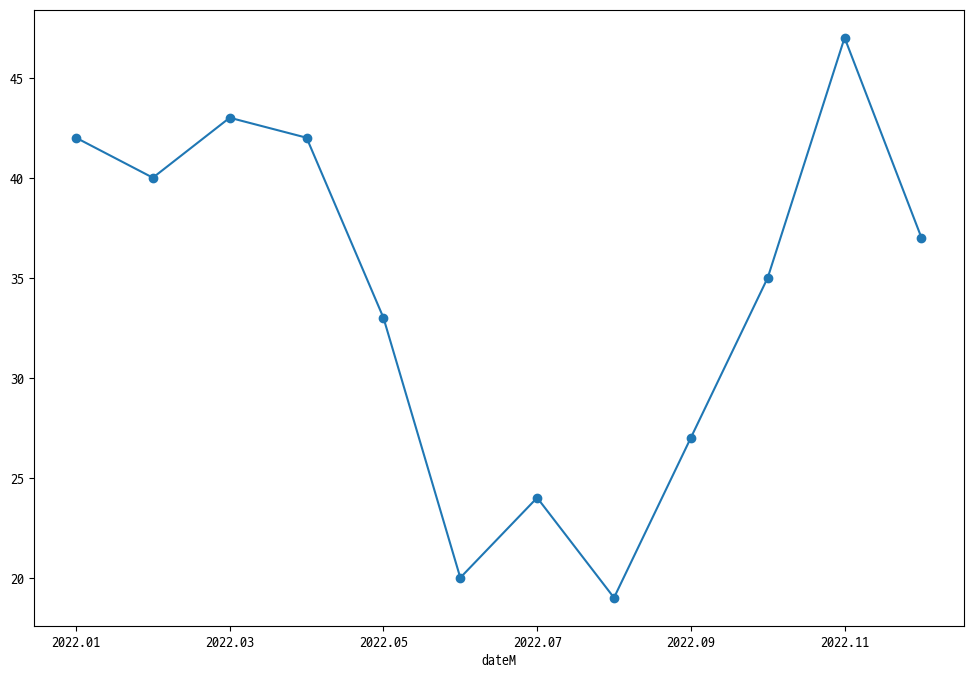

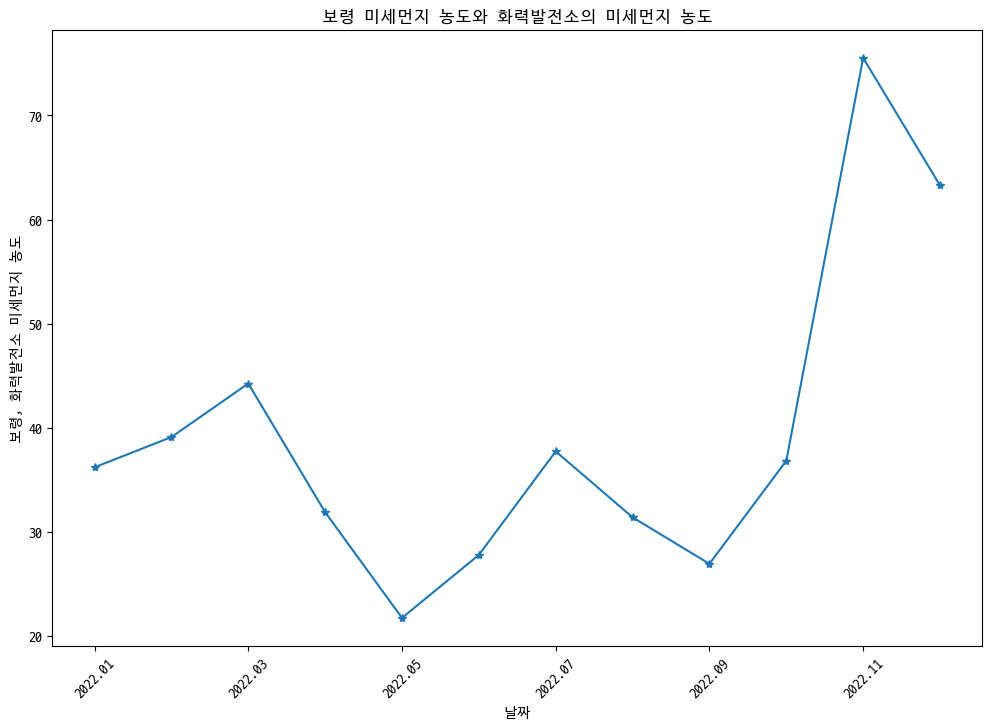

In [42]:
result_bo_mis.plot(x='dateM', y='보령 미세먼지 농도', kind='line', marker='o', figsize=(12, 8), legend=False)
result_bo_mis.plot(x='dateM', y='pm10value', kind='line', marker='*', figsize=(12, 8), legend=False)
plt.title('보령 미세먼지 농도와 화력발전소의 미세먼지 농도')
plt.xlabel('날짜')
plt.ylabel('보령, 화력발전소 미세먼지 농도')
plt.xticks(rotation=45)
plt.show()

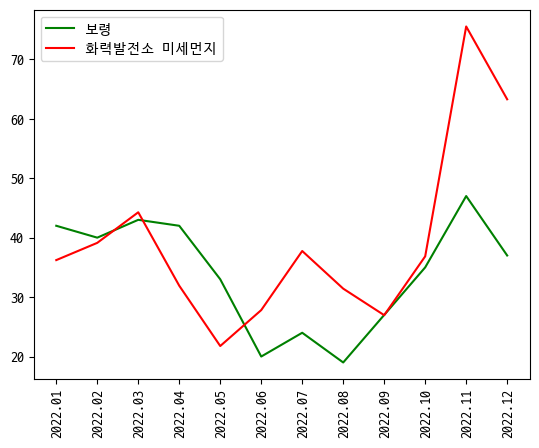

In [43]:
plt.plot(result_bo_mis['dateM'], result_bo_mis['보령 미세먼지 농도'], color='g', label='보령')
plt.plot(result_bo_mis['dateM'], result_bo_mis['pm10value'], color='r', label='화력발전소 미세먼지')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [44]:
result_bo_mis.corr()

,dateM,보령 미세먼지 농도,pm10value,pm25value
dateM,1.000000,-0.213420,0.478228,0.271356
보령 미세먼지 농도,-0.213420,1.000000,0.554730,-0.015374
pm10value,0.478228,0.554730,1.000000,0.301139
pm25value,0.271356,-0.015374,0.301139,1.000000


In [45]:
boo = mis[mis['구분(2)'] == '부여']

In [46]:
boo

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
81,충청남도,부여,43,45,47,43,35,37,22,28,...,35,33,27,20,23,18,21,28,38,34


In [47]:
boo = mis[mis['구분(2)'] == '부여']
boo = boo.transpose().reset_index()
boo = boo.loc[26:,:]
boo.reset_index(drop=True, inplace=True)
boo = boo.rename(columns={'index' : 'dateM', 81: '부여 미세먼지 농도'})

In [48]:
boo

,dateM,부여 미세먼지 농도
0,2022.01,34
1,2022.02,33
2,2022.03,35
3,2022.04,33
4,2022.05,27
5,2022.06,20
6,2022.07,23
7,2022.08,18
8,2022.09,21
9,2022.10,28


In [78]:
result_mis = pd.concat([boo, ochan_gonmis_df, bo['보령 미세먼지 농도']], axis=1)
result_mis.head()

,dateM,부여 미세먼지 농도,date,pm10value,pm25value,보령 미세먼지 농도
0,2022.01,34,2022-01-01,36.224462,34.390457,42
1,2022.02,33,2022-02-01,39.125000,25.220982,40
2,2022.03,35,2022-03-01,44.268817,15.575941,43
3,2022.04,33,2022-04-01,31.916667,10.104167,42
4,2022.05,27,2022-05-01,21.768817,6.549731,33


In [79]:
result_mis.drop('date',axis=1,  inplace=True)

In [85]:
result_mis['부여 미세먼지 농도'] = result_mis['부여 미세먼지 농도'].astype('int')
result_mis['보령 미세먼지 농도'] = result_mis['보령 미세먼지 농도'].astype('int')

In [86]:
result_mis[['pm10value', 'pm25value']] = result_mis[['pm10value', 'pm25value']].apply(abs)

In [87]:
result_mis[['pm10value', 'pm25value']] = result_mis[['pm10value', 'pm25value']].round().astype('int')

In [88]:
result_mis

,dateM,부여 미세먼지 농도,pm10value,pm25value,보령 미세먼지 농도
0,2022.01,34,36,34,42
1,2022.02,33,39,25,40
2,2022.03,35,44,16,43
3,2022.04,33,32,10,42
4,2022.05,27,22,7,33
5,2022.06,20,28,13,20
6,2022.07,23,38,17,24
7,2022.08,18,31,37,19
8,2022.09,21,27,35,27
9,2022.10,28,37,25,35


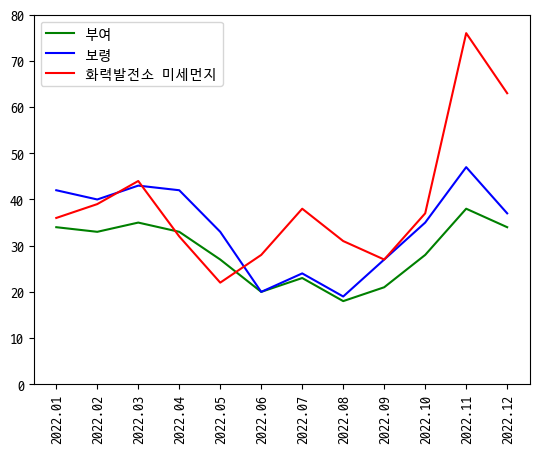

In [89]:
plt.plot(result_mis['dateM'], result_mis['부여 미세먼지 농도'], color='g', label='부여')
plt.plot(result_mis['dateM'], result_mis['보령 미세먼지 농도'], color='b', label='보령')
plt.plot(result_mis['dateM'], result_mis['pm10value'], color='r', label='화력발전소 미세먼지')
plt.ylim(0, 80)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [90]:
result_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dateM       12 non-null     object
 1   부여 미세먼지 농도  12 non-null     int32 
 2   pm10value   12 non-null     int32 
 3   pm25value   12 non-null     int32 
 4   보령 미세먼지 농도  12 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 416.0+ bytes


In [91]:
result_mis.corr()

,dateM,부여 미세먼지 농도,pm10value,pm25value,보령 미세먼지 농도
dateM,1.000000,-0.163788,0.481751,0.270256,-0.213420
부여 미세먼지 농도,-0.163788,1.000000,0.663086,-0.052706,0.974234
pm10value,0.481751,0.663086,1.000000,0.281624,0.554749
pm25value,0.270256,-0.052706,0.281624,1.000000,-0.014615
보령 미세먼지 농도,-0.213420,0.974234,0.554749,-0.014615,1.000000


In [96]:
cr = mis[mis['구분(2)'] == '청양']
cr = cr.transpose().reset_index()
cr = cr.loc[26:,:]
cr.reset_index(drop=True, inplace=True)
cr = cr.rename(columns={'index' : 'dateM', 82: '청양 미세먼지 농도'})

In [97]:
cr

,dateM,청양 미세먼지 농도
0,2022.01,42
1,2022.02,40
2,2022.03,44
3,2022.04,40
4,2022.05,30
5,2022.06,20
6,2022.07,22
7,2022.08,17
8,2022.09,20
9,2022.10,28


In [113]:
result_mis = pd.concat([boo, ochan_gonmis_df, bo['보령 미세먼지 농도'], cr['청양 미세먼지 농도']], axis=1)
result_mis['청양 미세먼지 농도'] = result_mis['청양 미세먼지 농도'].astype('int')
result_mis


,dateM,부여 미세먼지 농도,date,pm10value,pm25value,보령 미세먼지 농도,청양 미세먼지 농도
0,2022.01,34,2022-01-01,36.224462,34.390457,42,42
1,2022.02,33,2022-02-01,39.125000,25.220982,40,40
2,2022.03,35,2022-03-01,44.268817,15.575941,43,44
3,2022.04,33,2022-04-01,31.916667,10.104167,42,40
4,2022.05,27,2022-05-01,21.768817,6.549731,33,30
5,2022.06,20,2022-06-01,27.813194,13.267361,20,20
6,2022.07,23,2022-07-01,37.754032,17.337366,24,22
7,2022.08,18,2022-08-01,-31.422715,-37.331116,19,17
8,2022.09,21,2022-09-01,-26.957639,-34.614306,27,20
9,2022.10,28,2022-10-01,36.856183,24.639852,35,28


In [100]:
result_mis.corr()

,dateM,부여 미세먼지 농도,date,pm10value,pm25value,보령 미세먼지 농도,청양 미세먼지 농도
dateM,1.000000,-0.163788,0.999978,0.052278,-0.185010,-0.213420,-0.384531
부여 미세먼지 농도,-0.163788,1.000000,-0.162015,0.795867,0.736839,0.974234,0.967790
date,0.999978,-0.162015,1.000000,0.052838,-0.183769,-0.211561,-0.383045
pm10value,0.052278,0.795867,0.052838,1.000000,0.928011,0.682862,0.699898
pm25value,-0.185010,0.736839,-0.183769,0.928011,1.000000,0.650772,0.686316
보령 미세먼지 농도,-0.213420,0.974234,-0.211561,0.682862,0.650772,1.000000,0.953663
청양 미세먼지 농도,-0.384531,0.967790,-0.383045,0.699898,0.686316,0.953663,1.000000


In [101]:
result_mis.columns.to_list()

['dateM',
 '부여 미세먼지 농도',
 'date',
 'pm10value',
 'pm25value',
 '보령 미세먼지 농도',
 '청양 미세먼지 농도']

In [114]:
result_mis = result_mis[['dateM',
 'date',
 'pm10value',
 'pm25value',
 '부여 미세먼지 농도',
 '보령 미세먼지 농도',
 '청양 미세먼지 농도']]

In [122]:
result_mis2 = result_mis.drop('date', axis=1)

In [124]:
result_mis2

,dateM,pm10value,pm25value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도
0,2022.01,36.224462,34.390457,34,42,42
1,2022.02,39.125000,25.220982,33,40,40
2,2022.03,44.268817,15.575941,35,43,44
3,2022.04,31.916667,10.104167,33,42,40
4,2022.05,21.768817,6.549731,27,33,30
5,2022.06,27.813194,13.267361,20,20,20
6,2022.07,37.754032,17.337366,23,24,22
7,2022.08,31.422715,37.331116,18,19,17
8,2022.09,26.957639,34.614306,21,27,20
9,2022.10,36.856183,24.639852,28,35,28


In [123]:
result_mis2.corr()

,dateM,pm10value,pm25value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도
dateM,1.000000,0.478228,0.271356,-0.163788,-0.213420,-0.384531
pm10value,0.478228,1.000000,0.301139,0.663991,0.554730,0.496502
pm25value,0.271356,0.301139,1.000000,-0.047640,-0.015374,-0.117396
부여 미세먼지 농도,-0.163788,0.663991,-0.047640,1.000000,0.974234,0.967790
보령 미세먼지 농도,-0.213420,0.554730,-0.015374,0.974234,1.000000,0.953663
청양 미세먼지 농도,-0.384531,0.496502,-0.117396,0.967790,0.953663,1.000000


In [117]:
hos = mis[mis['구분(2)'] == '홍성']
hos = hos.transpose().reset_index()
hos = hos.loc[26:,:]
hos.reset_index(drop=True, inplace=True)
hos = hos.rename(columns={'index' : 'dateM', 79: '홍성 미세먼지 농도'})

In [118]:
hos

,dateM,홍성 미세먼지 농도
0,2022.01,42
1,2022.02,39
2,2022.03,44
3,2022.04,41
4,2022.05,31
5,2022.06,21
6,2022.07,22
7,2022.08,16
8,2022.09,24
9,2022.10,31


In [125]:
result_mis2 = pd.concat([result_mis2, hos['홍성 미세먼지 농도']], axis=1)
result_mis2['홍성 미세먼지 농도'] = result_mis2['홍성 미세먼지 농도'].astype('int')
result_mis[['pm10value', 'pm25value']] = result_mis[['pm10value', 'pm25value']].apply(abs)
result_mis2[['pm10value', 'pm25value']] = result_mis2[['pm10value', 'pm25value']].round().astype('int')
result_mis2

,dateM,pm10value,pm25value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도,홍성 미세먼지 농도
0,2022.01,36,34,34,42,42,42
1,2022.02,39,25,33,40,40,39
2,2022.03,44,16,35,43,44,44
3,2022.04,32,10,33,42,40,41
4,2022.05,22,7,27,33,30,31
5,2022.06,28,13,20,20,20,21
6,2022.07,38,17,23,24,22,22
7,2022.08,31,37,18,19,17,16
8,2022.09,27,35,21,27,20,24
9,2022.10,37,25,28,35,28,31


In [126]:
result_mis2.corr()

,dateM,pm10value,pm25value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도,홍성 미세먼지 농도
dateM,1.000000,0.481751,0.270256,-0.163788,-0.213420,-0.384531,-0.278074
pm10value,0.481751,1.000000,0.281624,0.663086,0.554749,0.493547,0.548594
pm25value,0.270256,0.281624,1.000000,-0.052706,-0.014615,-0.121257,-0.075788
부여 미세먼지 농도,-0.163788,0.663086,-0.052706,1.000000,0.974234,0.967790,0.981902
보령 미세먼지 농도,-0.213420,0.554749,-0.014615,0.974234,1.000000,0.953663,0.987684
청양 미세먼지 농도,-0.384531,0.493547,-0.121257,0.967790,0.953663,1.000000,0.981389
홍성 미세먼지 농도,-0.278074,0.548594,-0.075788,0.981902,0.987684,0.981389,1.000000


In [128]:
result_mis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dateM       12 non-null     object
 1   pm10value   12 non-null     int32 
 2   pm25value   12 non-null     int32 
 3   부여 미세먼지 농도  12 non-null     object
 4   보령 미세먼지 농도  12 non-null     object
 5   청양 미세먼지 농도  12 non-null     int32 
 6   홍성 미세먼지 농도  12 non-null     int32 
dtypes: int32(4), object(3)
memory usage: 608.0+ bytes


In [129]:
result_mis2['부여 미세먼지 농도'] = result_mis2['부여 미세먼지 농도'].astype('int')
result_mis2['보령 미세먼지 농도'] = result_mis2['보령 미세먼지 농도'].astype('int')

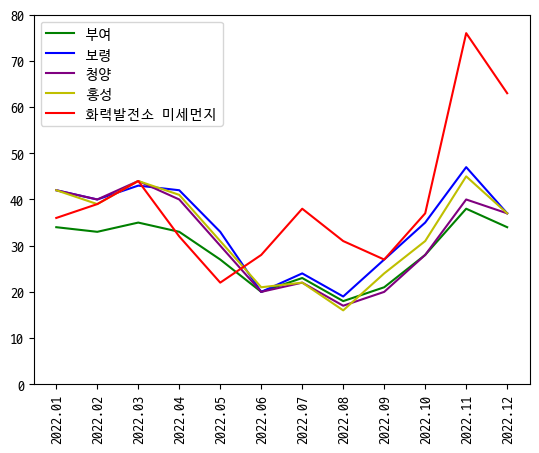

In [130]:
plt.plot(result_mis2['dateM'], result_mis2['부여 미세먼지 농도'], color='g', label='부여')
plt.plot(result_mis2['dateM'], result_mis2['보령 미세먼지 농도'], color='b', label='보령')
plt.plot(result_mis2['dateM'], result_mis2['청양 미세먼지 농도'], color='purple', label='청양')
plt.plot(result_mis2['dateM'], result_mis2['홍성 미세먼지 농도'], color='y', label='홍성')
plt.plot(result_mis2['dateM'], result_mis2['pm10value'], color='r', label='화력발전소 미세먼지')
plt.ylim(0, 80)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [131]:
result_mis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dateM       12 non-null     object
 1   pm10value   12 non-null     int32 
 2   pm25value   12 non-null     int32 
 3   부여 미세먼지 농도  12 non-null     int32 
 4   보령 미세먼지 농도  12 non-null     int32 
 5   청양 미세먼지 농도  12 non-null     int32 
 6   홍성 미세먼지 농도  12 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 512.0+ bytes


In [133]:
result_mis2.drop('pm25value', axis=1, inplace=True)

In [134]:
result_mis2

,dateM,pm10value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도,홍성 미세먼지 농도
0,2022.01,36,34,42,42,42
1,2022.02,39,33,40,40,39
2,2022.03,44,35,43,44,44
3,2022.04,32,33,42,40,41
4,2022.05,22,27,33,30,31
5,2022.06,28,20,20,20,21
6,2022.07,38,23,24,22,22
7,2022.08,31,18,19,17,16
8,2022.09,27,21,27,20,24
9,2022.10,37,28,35,28,31


In [135]:
result_mis2.corr()

,dateM,pm10value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도,홍성 미세먼지 농도
dateM,1.000000,0.481751,-0.163788,-0.213420,-0.384531,-0.278074
pm10value,0.481751,1.000000,0.663086,0.554749,0.493547,0.548594
부여 미세먼지 농도,-0.163788,0.663086,1.000000,0.974234,0.967790,0.981902
보령 미세먼지 농도,-0.213420,0.554749,0.974234,1.000000,0.953663,0.987684
청양 미세먼지 농도,-0.384531,0.493547,0.967790,0.953663,1.000000,0.981389
홍성 미세먼지 농도,-0.278074,0.548594,0.981902,0.987684,0.981389,1.000000


In [140]:
sch = mis[mis['구분(2)'] == '서천']
sch = sch.transpose().reset_index()
sch = sch.loc[26:,:]
sch.reset_index(drop=True, inplace=True)
sch = sch.rename(columns={'index' : 'dateM', 86: '서천 미세먼지 농도'})

In [141]:
sch

,dateM,서천 미세먼지 농도
0,2022.01,37
1,2022.02,36
2,2022.03,40
3,2022.04,39
4,2022.05,30
5,2022.06,19
6,2022.07,21
7,2022.08,17
8,2022.09,23
9,2022.10,29


In [142]:
result_mis2 = pd.concat([result_mis2, sch['서천 미세먼지 농도']], axis=1)
result_mis2['서천 미세먼지 농도'] = result_mis2['서천 미세먼지 농도'].astype('int')
result_mis2

,dateM,pm10value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도,홍성 미세먼지 농도,서천 미세먼지 농도
0,2022.01,36,34,42,42,42,37
1,2022.02,39,33,40,40,39,36
2,2022.03,44,35,43,44,44,40
3,2022.04,32,33,42,40,41,39
4,2022.05,22,27,33,30,31,30
5,2022.06,28,20,20,20,21,19
6,2022.07,38,23,24,22,22,21
7,2022.08,31,18,19,17,16,17
8,2022.09,27,21,27,20,24,23
9,2022.10,37,28,35,28,31,29


In [143]:
result_mis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dateM       12 non-null     object
 1   pm10value   12 non-null     int32 
 2   부여 미세먼지 농도  12 non-null     int32 
 3   보령 미세먼지 농도  12 non-null     int32 
 4   청양 미세먼지 농도  12 non-null     int32 
 5   홍성 미세먼지 농도  12 non-null     int32 
 6   서천 미세먼지 농도  12 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 512.0+ bytes


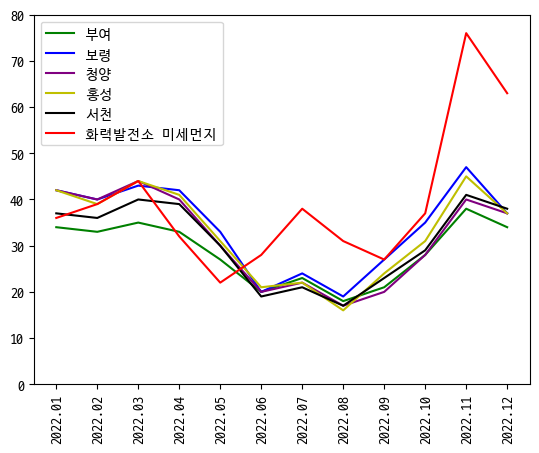

In [144]:
plt.plot(result_mis2['dateM'], result_mis2['부여 미세먼지 농도'], color='g', label='부여')
plt.plot(result_mis2['dateM'], result_mis2['보령 미세먼지 농도'], color='b', label='보령')
plt.plot(result_mis2['dateM'], result_mis2['청양 미세먼지 농도'], color='purple', label='청양')
plt.plot(result_mis2['dateM'], result_mis2['홍성 미세먼지 농도'], color='y', label='홍성')
plt.plot(result_mis2['dateM'], result_mis2['서천 미세먼지 농도'], color='black', label='서천')
plt.plot(result_mis2['dateM'], result_mis2['pm10value'], color='r', label='화력발전소 미세먼지')
plt.ylim(0, 80)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [145]:
result_mis2.corr()

,dateM,pm10value,부여 미세먼지 농도,보령 미세먼지 농도,청양 미세먼지 농도,홍성 미세먼지 농도,서천 미세먼지 농도
dateM,1.000000,0.481751,-0.163788,-0.213420,-0.384531,-0.278074,-0.196340
pm10value,0.481751,1.000000,0.663086,0.554749,0.493547,0.548594,0.582353
부여 미세먼지 농도,-0.163788,0.663086,1.000000,0.974234,0.967790,0.981902,0.985055
보령 미세먼지 농도,-0.213420,0.554749,0.974234,1.000000,0.953663,0.987684,0.978635
청양 미세먼지 농도,-0.384531,0.493547,0.967790,0.953663,1.000000,0.981389,0.974153
홍성 미세먼지 농도,-0.278074,0.548594,0.981902,0.987684,0.981389,1.000000,0.987633
서천 미세먼지 농도,-0.196340,0.582353,0.985055,0.978635,0.974153,0.987633,1.000000
